In [26]:
import pandas as pd
import numpy as np

In [27]:
stats=pd.read_csv("C:/Users/xnive/Downloads/imc_stats_k2.csv")
stats.head()

,ID,Country,Team,TeamName,Name,1,2,3,4,5,...,7,8,9,10,11,12,13,14,15,Total
0,ARE2A-P01,UAE,A-1,UAE A,Parth Goel,0.0,0.0,10.0,0.0,0.0,...,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
1,ARE2A-P02,UAE,A-2,UAE A,Vehaan Subramanian,0.0,10.0,0.0,10.0,0.0,...,10.0,0.0,10.0,0.0,0.0,10.0,10.0,0.0,0.0,60.0
2,ARE2A-P03,UAE,A-3,UAE A,Wasik Bin Hossain,10.0,0.0,10.0,10.0,0.0,...,10.0,0.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,70.0
3,ARE2A-P04,UAE,A-4,UAE A,Adiva Kapoor,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BGD2A-P01,Bangladesh,A-1,Bangladesh A,Areeb Noman,0.0,0.0,10.0,10.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0


In [28]:
stats=stats.drop(["ID", "Country", "Team", "TeamName", "Name", "Total"], axis=1)
stats=stats.drop([298,299,300,301,302,303,304])
stats=stats/10
stats.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Clustering Participants

In [29]:
import umap.umap_ as umap
reducer_stud=umap.UMAP(n_neighbors=15, min_dist=0.05)
embedding_stud=reducer_stud.fit_transform(stats.to_numpy())
embedding_stud.shape

(298, 2)

In [30]:
from sklearn.cluster import DBSCAN
labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(embedding_stud)

In [31]:
labels

array([ 0,  1,  1,  2,  2,  0,  2,  2,  1,  0,  2,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  0,  0,  0,  0,  1,
        1,  1,  0,  0,  2,  2,  2,  2,  0,  2,  2,  2,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  0,  0,  2,  0,  2,  0,  2,  2,  2,  2,  2,  0,
        1,  0,  1,  0,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,
        1,  1,  0,  1,  1, -1,  0,  0,  1,  0,  1,  0,  1,  2,  0,  2,  1,
        2,  0,  0,  0,  0,  2,  0,  1,  2,  1,  0,  2,  2,  1,  1,  2,  1,
        2,  2,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  2,  0,  0,  0,  0,  1,  1,  1,  1, -1,  1,  0,
        0,  0,  2,  1,  0,  1,  1,  0,  1,  1,  1,  0,  1,  0,  1,  1,  0,
        1,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  0,  1, -1,  1,  0,  0,  1,  1,  1,  1,  2,  0,  0,  1,  1,  1,
        0,  0,  1,  2,  0,  1,  1,  2,  2,  2,  2,  1,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  0

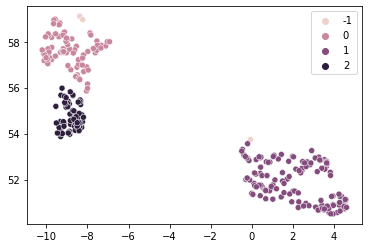

In [32]:
import seaborn as sns
sns.scatterplot(x=embedding_stud[:,0], y=embedding_stud[:,1], hue=labels)

Three sets of students, one for those with really low scores, one for those who basically only solved easy problems and the rest.

In [33]:
stats["labels"]=labels
stats.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,labels
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
2,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [43]:
stats[stats["labels"]==0]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,labels
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
11,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
18,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
287,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
289,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Clustering Problems

In [35]:
data=stats.drop("labels", axis=1).T
data.head()

,0,1,2,3,4,5,6,7,8,9,...,288,289,290,291,292,293,294,295,296,297
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
reducer_prob=umap.UMAP(n_neighbors=5, min_dist=0.1)
embedding_prob=reducer_prob.fit_transform(data.to_numpy())
embedding_prob.shape

(15, 2)

In [37]:
embedding_prob

array([[ 0.5400993 , -0.26091948],
       [-0.04164222,  0.11587582],
       [-2.6590953 ,  1.4949076 ],
       [-3.1995866 ,  1.3662173 ],
       [-1.5403572 ,  0.4036896 ],
       [ 0.4832089 ,  1.0558778 ],
       [-3.1468987 ,  2.5401943 ],
       [-0.75239915,  1.0508393 ],
       [-2.861505  ,  2.1310964 ],
       [-0.2524597 ,  1.0857838 ],
       [-1.0544165 , -0.20195718],
       [ 0.0939443 ,  0.65083784],
       [-3.4072971 ,  1.9035486 ],
       [-0.61914885,  0.42152524],
       [ 0.620087  ,  0.32601815]], dtype=float32)

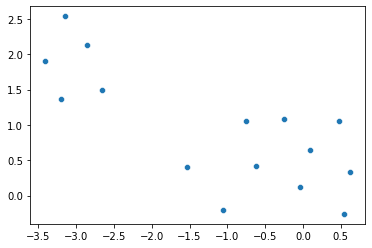

In [38]:
sns.scatterplot(x=embedding_prob[:,0], y=embedding_prob[:,1])

Analyzing these results we see that five points that seem to make a cluster and the 10 others make another. These five points belong to the easiest problems in the exam and we expect from the clustering logic that these five points are solved by almost the same probelms so that the same participants in general solve the easier problems. But for harder problems even though there are a few problems much harder than the others (statistically) they are not clustered together, showing that hard problems are not solved by the same students instead different participants with different strengths solve different hard problems.